# Creep Compliance Calculation in Viscoelastic Materials
This notebook calculates the creep compliance \( J(t) \) according to the data reported in A. Shih, S. J. Chung, O. B. Shende, S. E. Herwald, A. M. Vezeridis, G. G. Fuller; Viscoelastic measurements of abscess fluids using a magnetic stress rheometer. Physics of Fluids 1 November 2024; 36 (11): 111919. https://doi.org/10.1063/5.0238703

where:
- \( \eta_0 \): Viscosity coefficient
- \( G_1, G_2 \): Shear moduli
- \( \eta_1, \eta_2 \): Viscosity coefficients  
We compute \( J(t) \) over a range of time values.


## Step 1: Import Required Libraries
We import `numpy` for numerical operations and `matplotlib` for plotting results.


In [40]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas

## Step 2: Define the Function \( J(t) \)
This function computes the creep compliance \( J(t) \) for given parameters:
- \( \eta_0 \): Viscosity coefficient
- \( G_1, G_2 \): Shear moduli
- \( \eta_1, \eta_2 \): Viscosity coefficients


In [45]:
def J(t, eta_0, eta1_G1, eta2_G2, error_percent=0.03):
    """
    Compute the creep compliance J(t) at time t.
    
    Parameters:
        t (float or array): Time variable.
        eta_0 (float): Viscosity coefficient.
        eta1_G1 (float): Ratio of eta_1 / G_1.
        eta2_G2 (float): Ratio of eta_2 / G_2.
        
    Returns:
        float or array: Creep compliance J(t).
    """
    # Term 1: Linear contribution with viscosity eta_0
    term1 = t / eta_0
    
    # Term 2: Contribution with eta_1 / G_1
    term2 = eta1_G1 * (1 - np.exp(-t / eta1_G1))
    
    # Term 3: Contribution with eta_2 / G_2
    term3 = eta2_G2 * (1 - np.exp(-t / eta2_G2))
    
    # Combine terms
    J_value = term1 + term2 + term3
    
    # Add percentage error if error_percent > 0
    if error_percent > 0:
        noise = np.random.normal(0, error_percent * J_value, size=np.shape(J_value))
        J_value += noise
    
    return J_value


## Step 4: Compute \( J(t) \) Over a Range of Time
We evaluate \( J(t) \) for a range of time values from \( t = 0 \) to \( t = 50 \).


In [46]:
# Given parameters
eta_0 = 4.02       # Viscosity coefficient
eta1_G1 = 1.08     # eta_1 / G_1
eta2_G2 = 8.45     # eta_2 / G_2

# Time range: From 0 to 50 with 100 steps
t_values = np.logspace(-2, 0.6, 250)

# Compute J(t) for all time values
J_values = J(t_values, eta_0, eta1_G1, eta2_G2)


## Step 5: Plot the Results
We plot \( J(t) \) as a function of time to visualize the creep compliance behavior.


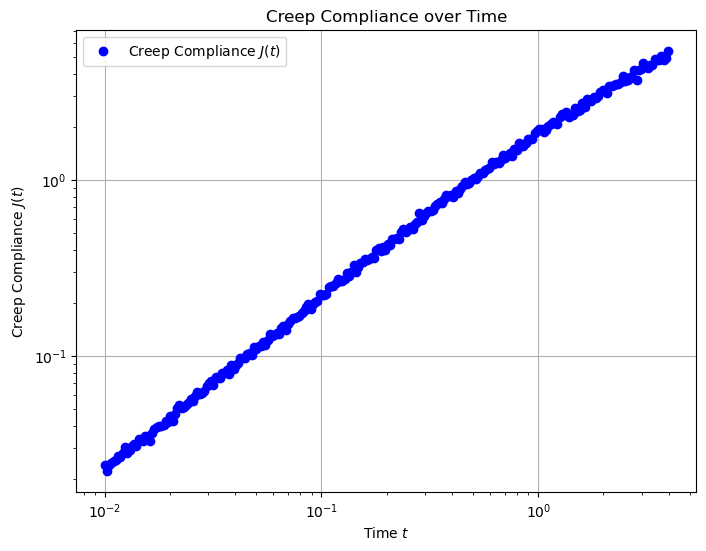

In [47]:
import matplotlib.pyplot as plt

# Plot J(t) vs Time
plt.figure(figsize=(8, 6))
plt.plot(t_values, J_values, "o", label='Creep Compliance $J(t)$', color='blue')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Time $t$')
plt.ylabel('Creep Compliance $J(t)$')
plt.title('Creep Compliance over Time')
plt.legend()
plt.grid(True)
plt.show()


## Step 6: Save Results to CSV
We save the computed \( J(t) \) values into a CSV file using `pandas`. The file will have two columns:
1. **Time**: Time values \( t \)
2. **Creep Compliance**: Corresponding \( J(t) \) values  

The file will be tab-separated for better readability.


In [48]:
import pandas as pd

# Create a DataFrame to store Time and Creep Compliance
data = pd.DataFrame({
    "Time": t_values,
    "Creep Compliance": J_values
})

# Save DataFrame to a tab-separated CSV file
data.to_csv("creep_perihepatic_data.csv", sep="\t", index=False)

print("Data saved successfully to 'creep_perihepatic_data.csv'")


Data saved successfully to 'creep_perihepatic_data.csv'
